In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

In [ ]:
def linear_func(x, m, c):
    return m * x + c


In [ ]:
data= pd.read_csv('reflectancia.csv',header=1,sep=';')
data

,Long. Onda (nm),%R,Unnamed: 2
0,2500,"17,24248695",NaN
1,2499,"17,20637131",NaN
2,2498,"17,25340652",NaN
3,2497,"17,31297302",NaN
4,2496,"17,26745987",NaN
...,...,...,...
2296,204,"11,40156937",NaN
2297,203,"14,7976284",NaN
2298,202,"6,022754669",NaN
2299,201,"8,175683022",NaN


In [ ]:
cobalto = data.iloc[:, :2]
cobalto

,Long. Onda (nm),%R
0,2500,"17,24248695"
1,2499,"17,20637131"
2,2498,"17,25340652"
3,2497,"17,31297302"
4,2496,"17,26745987"
...,...,...
2296,204,"11,40156937"
2297,203,"14,7976284"
2298,202,"6,022754669"
2299,201,"8,175683022"


In [ ]:
cobalto = cobalto.applymap(lambda x: str(x).replace(',', '.') if pd.notnull(x) else x)

print(cobalto)


     Long. Onda (nm)           %R
0               2500  17.24248695
1               2499  17.20637131
2               2498  17.25340652
3               2497  17.31297302
4               2496  17.26745987
...              ...          ...
2296             204  11.40156937
2297             203   14.7976284
2298             202  6.022754669
2299             201  8.175683022
2300             200  10.40744495

[2301 rows x 2 columns]


In [ ]:
cobalto = cobalto.apply(lambda col: pd.to_numeric(col, errors='coerce'))
cobalto

,Long. Onda (nm),%R
0,2500,17.242487
1,2499,17.206371
2,2498,17.253407
3,2497,17.312973
4,2496,17.267460
...,...,...
2296,204,11.401569
2297,203,14.797628
2298,202,6.022755
2299,201,8.175683


In [ ]:
#cobalto = cobalto.loc[cobalto['%R'] >= 0]
cobalto = cobalto.loc[cobalto['Long. Onda (nm)'] <=2000]
#cobalto['%R'] = savgol_filter(cobalto['%R'], 15, 3)  # Example Savitzky-Golay filter
#cobalto['%R'] = (cobalto['%R'] - cobalto['%R'].min()) / (cobalto['%R'].max() - cobalto['%R'].min())
cobalto

,Long. Onda (nm),%R
500,2000,17.195923
501,1999,17.192528
502,1998,17.211952
503,1997,17.185501
504,1996,17.196188
...,...,...
2296,204,11.401569
2297,203,14.797628
2298,202,6.022755
2299,201,8.175683


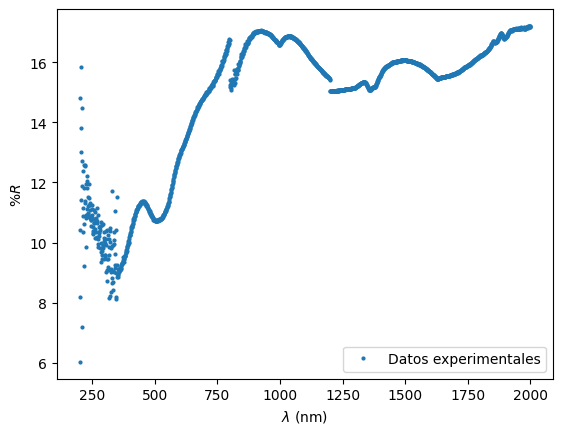

In [ ]:
plt.plot(cobalto['Long. Onda (nm)'], cobalto['%R'], 'o', markersize=2, label='Datos experimentales')
plt.xlabel(r'$\lambda$ (nm)')
plt.ylabel(r'$\% R$')
plt.legend()
plt.savefig('Reflectancia.pdf')
plt.show()


In [ ]:
#Tauc method
R=cobalto['%R']/100
k=(1-R)**2
s=2*R
FR=k/s
E=1240/cobalto['Long. Onda (nm)']
sqrtFRhv=np.sqrt((FR*E))
FRhv2=(FR*E)**2
E[1080:1141], FRhv2[1080:1141]

(1580    1.347826
 1581    1.349293
 1582    1.350763
 1583    1.352236
 1584    1.353712
           ...   
 1636    1.435185
 1637    1.436848
 1638    1.438515
 1639    1.440186
 1640    1.441860
 Name: Long. Onda (nm), Length: 61, dtype: float64,
 1580    7.382728
 1581    7.417791
 1582    7.415580
 1583    7.455252
 1584    7.467602
           ...   
 1636    9.045181
 1637    9.196254
 1638    9.055450
 1639    9.211443
 1640    9.326294
 Length: 61, dtype: float64)

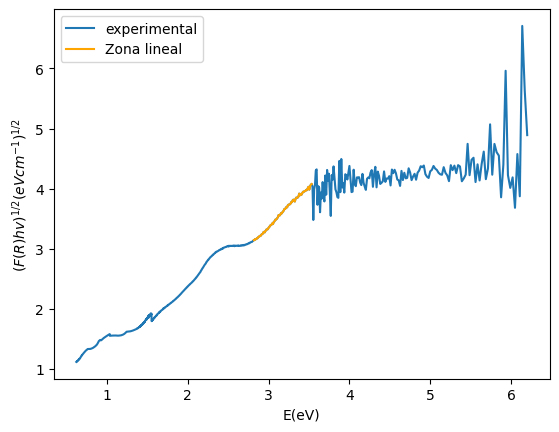

In [ ]:
#Gap indirecto
plt.plot(E,sqrtFRhv, label="experimental")
plt.plot(E[1560:1650],sqrtFRhv[1560:1650],color='orange', label='Zona lineal')
plt.xlabel('E(eV)')
plt.ylabel(r'$(F(R)hv)^{1/2} (eVcm^{-1})^{1/2}$')
plt.legend()
plt.savefig("gap_indirecto.pdf")
plt.show()

In [ ]:
#Peak 1
#línea tangente
x=E[1560:1650].values
y=sqrtFRhv[1560:1650].values
# Perform the curve fitting
params1, covariance1 = curve_fit(linear_func, x, y)
# Get the optimized parameters
m_opt1, c_opt1 = params1
#fitted values
y_fitted1=linear_func(x,m_opt1,c_opt1)
# Calculate the Pearson correlation coefficient
r1 = np.corrcoef(y, y_fitted1)[0, 1]  # Using numpy's corrcoef to calculate Pearson's r
error1=covariance1[0][0]/np.abs(c_opt1) + covariance1[1][1]/np.abs(m_opt1)

print(f"Pearson correlation coefficient (r): {r1}")
print(error1, m_opt1,c_opt1, covariance1)

Pearson correlation coefficient (r): 0.9979077208422147
0.0007691894324704136 1.3603626652022904 -0.7179934212296373 [[ 8.82756566e-05 -2.77971731e-04]
 [-2.77971731e-04  8.79123094e-04]]


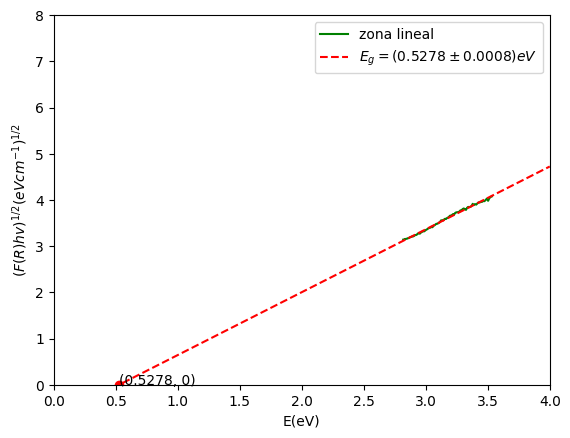

In [ ]:
x_1=np.linspace(0,4,100)
y_1=x_1*m_opt1 +c_opt1
yo=np.linspace(0,0,100)
plt.plot(E[1560:1650],sqrtFRhv[1560:1650],color='green', label='zona lineal')
plt.plot(x_1, y_1,color='red', linestyle='--',label=f'$E_g=({c_opt1/(-m_opt1):.4f}\pm{error1:.4f})eV$')
#plt.plot(x_1,yo,color='black',linestyle='--')
plt.plot(c_opt1/(-m_opt1), 0, 'ro')
plt.text(c_opt1/(-m_opt1), 0, f'({c_opt1/(-m_opt1):.4f}, {0})', ha='left')
plt.xlabel('E(eV)')
plt.ylabel(r'$(F(R)hv)^{1/2} (eVcm^{-1})^{1/2}$')
plt.xlim(0, 4)  # Set the x-axis limits from 1 to 4
plt.ylim(0, 8)  # Set the y-axis limits from 2 to 8
plt.legend()
plt.savefig("gap_indirecto_lineal.pdf")
plt.show()

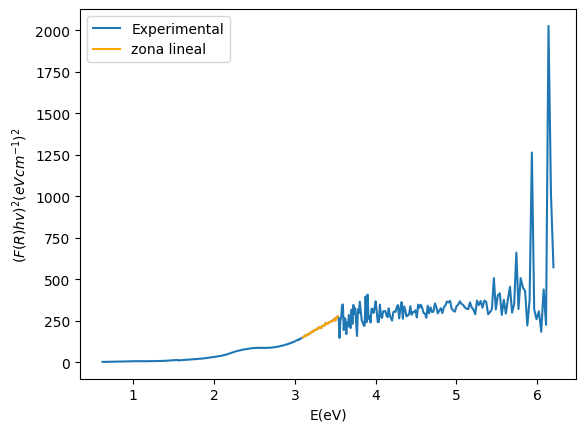

In [ ]:
#Gap directo

plt.plot(E,FRhv2,label='Experimental')
plt.plot(E[1600:1650],FRhv2[1600:1650],color='orange', label='zona lineal')
plt.xlabel('E(eV)')
plt.ylabel(r'$(F(R)hv)^{2} (eVcm^{-1})^{2}$')
plt.legend()
plt.savefig("gapdirecto.pdf")
plt.show()

In [ ]:
#Peak 2
#línea tangente
x2=E[1600:1650].values
y2=FRhv2[1600:1650].values
# Perform the curve fitting
params2, covariance2 = curve_fit(linear_func, x2,y2)

# Get the optimized parameters
m_opt2, c_opt2 = params2
#fitted values
y_fitted2=linear_func(x2,m_opt2,c_opt2)
# Calculate the Pearson correlation coefficient
r2 = np.corrcoef(y2, y_fitted2)[0, 1]  # Using numpy's corrcoef to calculate Pearson's r
error2=covariance2[0][0]/np.abs(c_opt2) + covariance2[1][1]/np.abs(m_opt2)
print(f"Pearson correlation coefficient (r): {r2}")
print(covariance2)
print(error2,f'{c_opt2/(-m_opt2)}', f'${m_opt2:.2e}\pm{covariance2[0][0]:.2e}$', f'${c_opt2:.2e}\pm{covariance2[1][1]:.2e}$')

Pearson correlation coefficient (r): 0.996105746897138
[[ 12.39716799 -40.99934234]
 [-40.99934234 135.79210732]]
0.5103278493596014 2.5531594442861505 $2.76e+02\pm1.24e+01$ $-7.04e+02\pm1.36e+02$


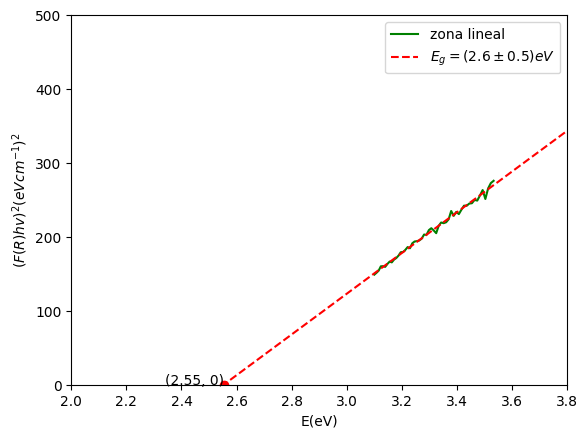

In [ ]:
x_2=np.linspace(0,4, 100)
y_2=x_2*m_opt2 +c_opt2
yo1=np.linspace(0,0,100)
plt.plot(E[1600:1650],FRhv2[1600:1650],color='green', label= 'zona lineal')
plt.plot(x_2, y_2,color='red',linestyle='--', label=f'$E_g=({c_opt2/(-m_opt2):.1f}\pm{error2:.1f})eV$')
plt.plot(c_opt2/(-m_opt2), 0, 'ro')
plt.text(c_opt2/(-m_opt2),0 , f'({c_opt2/(-m_opt2):.2f}, {0})', ha='right')
#plt.plot(x_2,yo1,color='black',linestyle='--')
plt.xlim(2, 3.8)  # Set the x-axis limits from 1 to 4
plt.ylim(0, 500)  # Set the y-axis limits from 2 to 8
plt.xlabel('E(eV)')
plt.ylabel(r'$(F(R)hv)^{2} (eVcm^{-1})^{2}$')
plt.legend()
plt.savefig("gapdirecto_lineal.pdf")
plt.show()